In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn


print('Python: {}'.format(sys.version))
print('Numpy:{}'.format(numpy.__version__))
print('Pandas:{}'.format(pandas.__version__))
print('Matplotlib:{}'.format(matplotlib.__version__))
print('Seaborn:{}'.format(seaborn.__version__))
print('Scipy:{}'.format(scipy.__version__))
print('Sklearn:{}'.format(sklearn.__version__))

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Numpy:1.19.2
Pandas:1.1.3
Matplotlib:3.3.2
Seaborn:0.11.0
Scipy:1.5.2
Sklearn:0.23.2


In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# get the data
import os
os.getcwd()
os.chdir('C:\\Users\\barla\\OneDrive\\Desktop\\Academia\\Data Science and Economics\\Risk Management\\Fraud Detection-Machine Learning\\Dataset')
data= pd.read_csv('creditcard.csv')

In [4]:
#Exploring the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(data.columns)

#We have 31 columns, V's are actually the result of PCA dimentionality reduction that was used to protect the sensitive
#information in this dataset. 
#For example, we do not want to expose the identity of the individual who did the credit-card transaction, location etc.
#The columns Class has values between 0 and 1 where 0 means a valid transaction while 1 means a fraudulent transaction.
#PCA has not applied to Time and Amount, where time is the seconds elapsed between each transaction while 
#the Amount is the Amount of transaction.


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
data.shape

#we have 284807 rows and 31 columns.
#If we look at the class, we see that the mean is very close to zero meaning that we have way more valid transasctions 
#than the fraudulent ones, as expected.


(284807, 31)

In [7]:
print(data.describe())

# The count is the same for all the variables so we do not have any missing data.



                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [8]:
#it is a very large dataset, for the sake of simplity of the computational requirements and to save time, 
#I will use only the 10 percent of the dataset extrating from the original data randomly.

data= data.sample(frac=0.1, random_state=1)
data.shape

#so now we have only 10% of the whole dataset.

(28481, 31)

In [9]:
print(data.describe())
#the mean for the class has slighlty increased but since the interval is only between 0 and 1,
#this slight increase might mean something.


                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334985      1.2

Text(0, 0.5, 'Frequency')

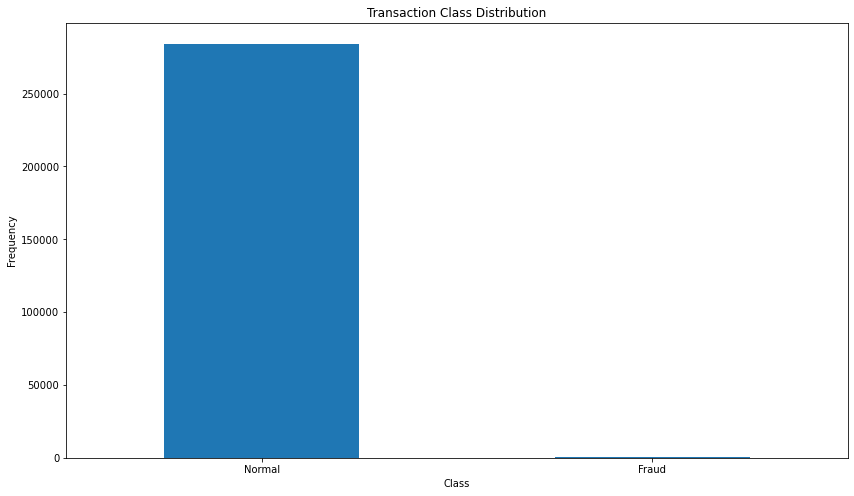

In [8]:
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED= 42

LABELS=['Normal','Fraud']
count_classes= pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

#We already knew that it was an inbalanced dataset but it is more striking to see a plot. 
#Fraud transactions are really really small.
#in fact, it is even difficult to discern them in the histrogram.

In [10]:
#Number of Frauds
# so we have about .17% of fraudulent cases of total 49 fraudulent cases.
# It is important to know the actualy fraudulent cases before training our dataset for the algorithms because if we train the 
#dataset with an over-representation of fraud cases, then we will predict more fraud cases than there actually is.
Fraud= data[data['Class']==1]
Valid= data[data['Class']==0]

outlier_fraction= len(Fraud)/ float(len(Valid))
print(outlier_fraction)

print('Fraud Cases:{}'.format(len(Fraud)))
print('Valid Cases:{}'.format(len(Valid)))


0.0017234102419808666
Fraud Cases:49
Valid Cases:28432


In [11]:
fraud=data[data['Class']==1]

normal= data[data['Class']==0]

print(fraud.shape)
print(normal.shape)
#we have only 492 fraud transasctions.

(49, 31)
(28432, 31)


In [12]:
fraud.Amount.describe()
#The mean value for fraud transactions is 122 euros, where the max is 2125.

count      49.000000
mean      173.505306
std       387.996569
min         0.000000
25%         1.000000
50%         4.900000
75%       122.680000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
normal.Amount.describe()
#The mean for valid transactions is visibly lower than that of  fraud ones. what this is telling us is that people tend to
# use higher amount when doing fraud transactions which makes sense.

count    28432.000000
mean        89.813898
std        270.636594
min          0.000000
25%          5.990000
50%         22.380000
75%         78.820000
max      19656.530000
Name: Amount, dtype: float64

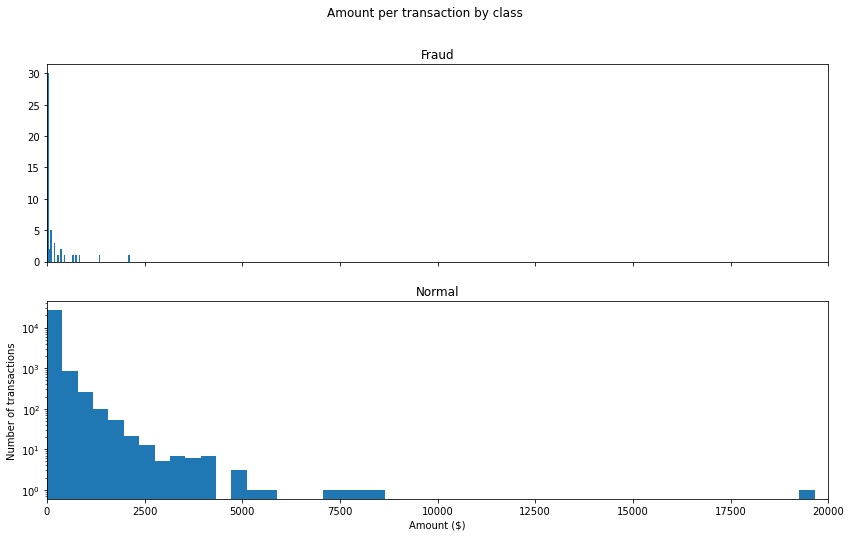

In [16]:
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED= 42
LABELS=['Normal','Fraud']
f, (ax1,ax2)= plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins=50

ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show();

#Amounts of transactions can be seen in a better way separated by the class.

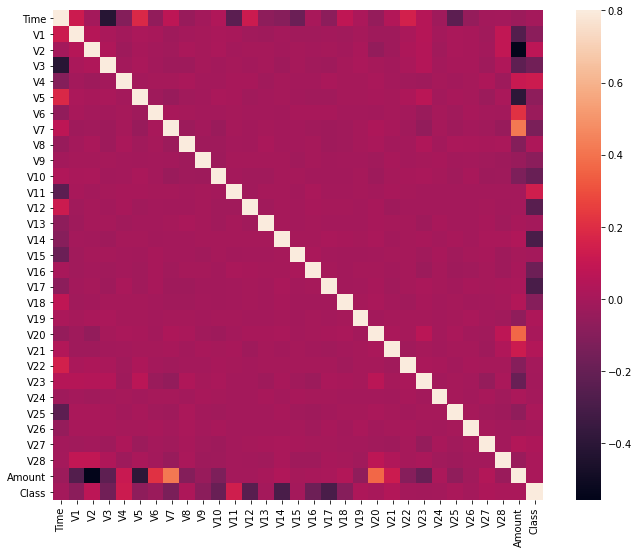

In [17]:
corrmat= data.corr()
fig= plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax= .8, square=True)
plt.show()

#There seems to be not any correlation between variables, there are clustered around 0.
#I hoped to see a correlation between class and amount/time, however there is nothing significant to comment about.

In [18]:
#Before moving to actual Machine Learning application on the dataset, we need to format our dataset slighlty.

columns= data.columns.tolist()

#filter the columns to remove the data we do not want

columns= [c for c in columns if c not in ['Class']]

#store the variable we will be predicting

target= 'Class'

X= data[columns] #without the class column in it

Y= data[target]

#Let's see if everything works correctly

print(X.shape)
print(Y.shape)

#So we have 30 colums without class, so its ok!
#While Y has only one column which is the class.

(28481, 30)
(28481,)


In [19]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#The localoutlierfactor is an unsupervied outlier detection method, it calculates the anomaly score of each sample and
# ıt measures the local deviation of density of a given sample with respect to its neighbors. So the anomaly score depends on
# how isolated the object is from its neighbors

#Isolationforest method is a little different. It calculats the anomaly score of each sample using this isolation forest method
# that isolating each observation by randomly selecting a feature and randomly selecting a split value between the maximun and
#minimum values of the selected feature. 


#define a random state
state=1

#define the outlier detection methods 

classifiers= {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination= outlier_fraction,# already calculated above
                                        random_state=state),
    
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors=20, 
    contamination= outlier_fraction)
}

In [20]:
#fit the model

n_outliers= len(Fraud) # number of outliers

for i, (clf_name, clf) in enumerate(classifiers.items()): 
    
    #fit the data and tag outliers
    if clf_name== "Local Outlier Factor":
        y_pred= clf.fit_predict(X)
        scores_pred= clf.negative_outlier_factor_
   
        
        #It is using two fitting methods depending on whether it is a Local outlier factor or not.
        #The y_pred here is going to give us -1 and 1 depending on the object being outlier or an inlier.  
        #So we need to process it a litte bit to compare it to our class labels.
        #Reshape values to 0 for valid and to 1 for fraud.
        y_pred[y_pred==1]=0
        y_pred[y_pred==-1]=1
        n_errors= (y_pred!=Y).sum()

        # Run the classification matrix.

        print( '{}:{}'.format(clf_name, n_errors))
        print(accuracy_score(Y,y_pred))
        print(classification_report(Y, y_pred))
      
    # So we have a Local outlier Factor here with 97 outliers, and the precision is really high with 99%. We have a precision
     # 100% for class 0 while it is 0.02 for 1 which is fraudulent cases. We have a really fwe fraudulent cases that are 
    # labelled as fraudulent. We actually miss to catch them!


Local Outlier Factor:97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



In [21]:
#fit the model

n_outliers= len(Fraud) # number of outliers

for i, (clf_name, clf) in enumerate(classifiers.items()): 
    
    #fit the data and tag outliers
    if clf_name== "Local Outlier Factor":
        y_pred= clf.fit_predict(X)
        scores_pred= clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred= clf.decision_function(X)
        y_pred = clf.predict(X)
   
        
        y_pred[y_pred==1]=0
        y_pred[y_pred==-1]=1
        n_errors= (y_pred!=Y).sum()


        print( '{}:{}'.format(clf_name, n_errors))
        print(accuracy_score(Y,y_pred))
        print(classification_report(Y, y_pred))
    
    
    
  #The isolation forest method here with 71 errors, relatively high, however, the precision that we have is .99 which is
  #very high.
  #However, when we look at the classses, namely, the values 0 and 1, we see that we are 100% accurate at predicting 0 while
  #only .28 for the class 1 that is low but way better than the previous method. not really good.

Isolation Forest:71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481



Observations:

IsolationForest detected 71 errors while LOF detected 97 errors.
IsolationForest has 99.75% accuracy while LOF has 99.65%
When it comes to detect fraud cases, IsolationMethod worked way more better than the LOF.
IsolationMethod detected 28% of Fraud cases while LOF detected only 2% of it.
We can improve this accuracy by using a greater sample size or using deep learning algorithms however at the cost of computational expense.